In [8]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as up
from mpl_toolkits.mplot3d import Axes3D
from stl import mesh
from mpl_toolkits import mplot3d
import scipy.stats as stats
import os

#import ParticlePlottingFunctions
import ParticlePlottingFunctions as ppf
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# file1 = "runs/5UCN_Ostart_noMag.root" #no fields, 200e-9 energy
file1 = "runs/5UCN_Ostart_MagMap.root" #mapped field, 10e-9


#get our two different data folders already for ease
config = up.open(file1+":config")
Nend = up.open(file1+":neutronend")
Nsnapshot = up.open(file1+":neutronsnapshot")
Ntrack = up.open(file1+":neutrontrack")

In [10]:
particleTrack_all = Ntrack.arrays(['particle', 'polarisation', 't', 'x', 'y', 'z', 'vx', 'vy', 'vz', 
                    'H', 'E', 'Bx', 'dBxdx', 'dBxdy', 'dBxdz', 'By', 'dBydx', 'dBydy', 
                                   'dBydz', 'Bz', 'dBzdx', 'dBzdy', 'dBzdz'], library="np")

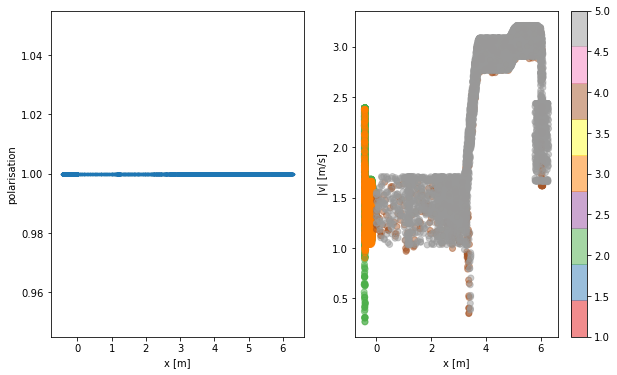

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))

axs[0].scatter(particleTrack_all['x'], particleTrack_all['polarisation'], s=5)
axs[0].set_xlabel('x [m]')
axs[0].set_ylabel('polarisation')

v = np.sqrt(particleTrack_all['vx']**2 + particleTrack_all['vy']**2 + particleTrack_all['vz']**2)

br = axs[1].scatter(particleTrack_all['x'], v, c=particleTrack_all['particle'], alpha=0.5, cmap='Set1')
axs[1].set_xlabel('x [m]')
axs[1].set_ylabel('|v| [m/s]')
plt.colorbar(br)
plt.show()

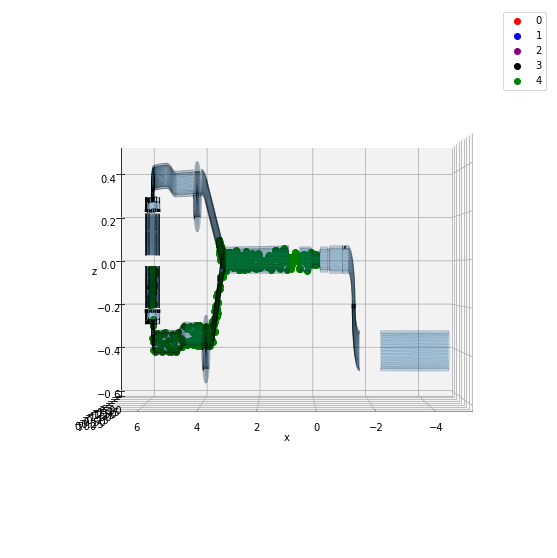

In [12]:
%matplotlib inline 
#lets you move the graph around within jupyter lab
# %matplotlib widget

numParticles = int(config["GLOBAL/simcount;1"][:].split()[0])

particleTrack_one = Ntrack.arrays(['particle', 'polarisation', 't', 'x', 'y', 'z', 'vx', 'vy', 'vz', 
                        'H', 'E', 'Bx', 'dBxdx', 'dBxdy', 'dBxdz', 'By', 'dBydx', 'dBydy', 
                                       'dBydz', 'Bz', 'dBzdx', 'dBzdy', 'dBzdz'], f"(particle=={0}) & (x > 0)", library="np")

x = particleTrack_one['x'].astype(float)
y = particleTrack_one['y'].astype(float)
z = particleTrack_one['z'].astype(float)
times = particleTrack_one['t'].astype(float)

figVals = ppf.plot3D(x, y, z, label="0", startPlot=True, ls="", 
                              endPlot=False, size=(10,10), c='red')
fig, axis = figVals

colors = ['blue', 'purple', 'black', 'green', 'orange']

for particle_num in range(1, numParticles):

    particleTrack_one = Ntrack.arrays(['particle', 'polarisation', 't', 'x', 'y', 'z', 'vx', 'vy', 'vz', 
                        'H', 'E', 'Bx', 'dBxdx', 'dBxdy', 'dBxdz', 'By', 'dBydx', 'dBydy', 
                                       'dBydz', 'Bz', 'dBzdx', 'dBzdy', 'dBzdz'], f"(particle=={particle_num}) & (x > 0)", library="np")

    x = particleTrack_one['x'].astype(float)
    y = particleTrack_one['y'].astype(float)
    z = particleTrack_one['z'].astype(float)
    times = particleTrack_one['t'].astype(float)

    figVals = ppf.plot3D(x, y, z, label=f"{particle_num}", startPlot=False, ls="", 
                                  endPlot=False, size=(15,15), figVals=[fig, axis], c=colors[particle_num-1])
    fig, axis = figVals

# axis.view_init(elev=10., azim=45)
axis.view_init(elev=0., azim=90)

#loads all the file I have in this folder as STLs
STLpath = 'STLsToGraph'
stl_array = os.listdir(STLpath)

for STLfile in stl_array:
    ppf.graphSTL(STLpath+'/'+STLfile, axis)

#removes repeated legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axis.legend(by_label.values(), by_label.keys())

# axis.set_xlim(-0.5, 1)
# axis.set_ylim(-0.2, 0.2)
# axis.set_zlim(-0.4, 0.4)

# cb.ax.tick_params(labelsize=20)
# plt.tight_layout()
plt.show()

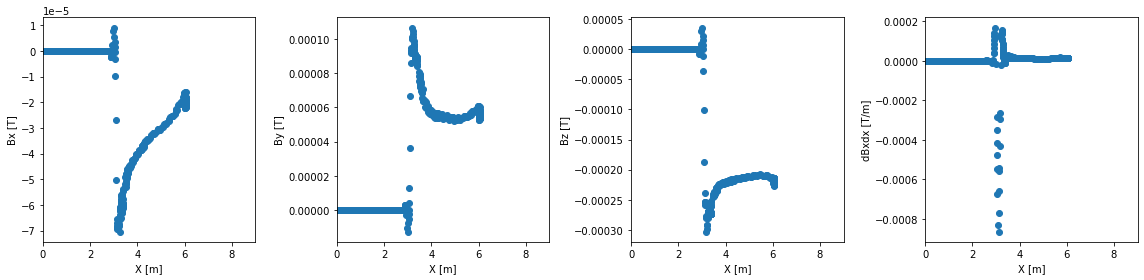

In [13]:
## Look at B vs positions
xlim = [0, 9]
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].plot(particleTrack_one['x'], particleTrack_one['Bx'], ls="", marker="o")
axs[0].set_ylabel('Bx [T]')
axs[0].set_xlabel('X [m]')
axs[0].set_xlim(xlim[0], xlim[1])
# axs[0].axvline(limits[0,0], label="Field starts", ls="--")
# axs[0].axvline(limits[0,1], label="Field ends", ls="--")

axs[1].plot(particleTrack_one['x'], particleTrack_one['By'], ls="", marker="o")
axs[1].set_ylabel('By [T]')
axs[1].set_xlabel('X [m]')
axs[1].set_xlim(xlim[0], xlim[1])

axs[2].plot(particleTrack_one['x'], particleTrack_one['Bz'], ls="", marker="o")
axs[2].set_ylabel('Bz [T]')
axs[2].set_xlabel('X [m]')
axs[2].set_xlim(xlim[0], xlim[1])

axs[3].plot(particleTrack_one['x'], particleTrack_one['dBxdx'], ls="", marker="o")
axs[3].set_ylabel('dBxdx [T/m]')
axs[3].set_xlabel('X [m]')
axs[3].set_xlim(xlim[0], xlim[1])

plt.tight_layout()

plt.show()

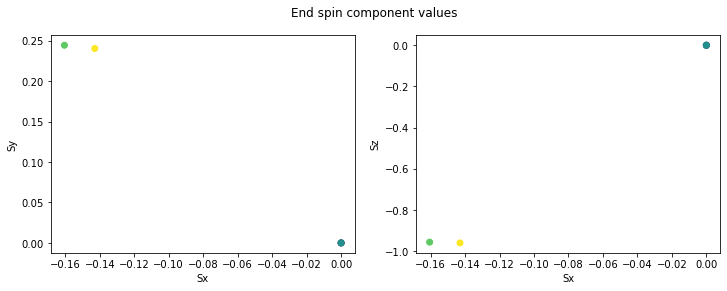

In [14]:
particleEnd_all = Nend.arrays(['particle', 'tstart', 'xstart', 'ystart', 'zstart', 'polstart', 'Hstart', 
                               'Estart', 'solidstart', 'tend', 'xend', 'yend', 'zend', 'polend', 'Hend',
                               'Eend', 'Bend', 'solidend', 'stopID', 'Nspinflip', 'Sxstart', 'Systart',
                               'Szstart', 'Sxend', 'Syend', 'Szend'], library="np")

fig, axs = plt.subplots(1, 2, figsize=(12,4))
plt.suptitle("End spin component values")

axs[0].scatter(particleEnd_all['Sxend'], particleEnd_all['Syend'], marker="o", c=particleEnd_all['particle'])
axs[0].set_xlabel('Sx')
axs[0].set_ylabel('Sy')
# axs[0].set_xlim(0, 1.5)

axs[1].scatter(particleEnd_all['Sxend'], particleEnd_all['Szend'], marker="o", c=particleEnd_all['particle'])
axs[1].set_xlabel('Sx')
axs[1].set_ylabel('Sz')
# axs[1].set_xlim(0, 1.5)
plt.show()